In [ ]:
# KUTUPHANELERİ IMPORT ETME VE DATA'YI OKUMA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # veri gorsellestirmek icin
import warnings
warnings.simplefilter (action = 'ignore')
# uyarilarin goruntulenmesini engeller
# action='ignore' parametresi, uyarilari goz ardi etmek icin bir eylem belirtir
# programin calismasi sirasinda cikan uyarilarin konsola yazdirilmamasini saglar

In [2]:
df = pd.read_csv("StudentsPerformance.csv")  # veriyi df DataFrame'e kaydeder

In [3]:
df.head()  # DataFrame'in ilk 5 satirini cagirid

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# VERİ DUZENLEME

In [6]:
df.isna().sum()  
# is.na(): sayi degilse True sayiysa False 
# .sum(): True degerlerini toplar

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.duplicated().sum()  # benzersiz satir sayisini bulur
# eger kendisinden bir tane daha ayni satir varsa True dondurur, yoksa False

0

In [8]:
df = df.rename({'race/ethnicity' : 'race',
                'parental level of education' : 'parental_level_of_education',
                'test preparation course' : 'test_preparation_course',
                'math score':'math_score', 
                'reading score':'reading_score',
                'writing score':'writing_score'}, axis = 1)
# sutun isimlerini daha kullanilabilir hale getirir

In [9]:
df.head()


,gender,race,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
df.test_preparation_course.unique()  # df'deki test_preparation_course sutununun farkli degerlerini getirir

array(['none', 'completed'], dtype=object)

In [11]:
# VERI OZELLIKLERI ARASINDAKİ KORELASYONU BULMA

In [12]:
df_corr = df[['test_preparation_course', 'math_score', 'reading_score', 'writing_score']]
# df'nin korelasyon degiskenine df'nin islem yapilacak sutunlarini atar

In [13]:
df_corr['test_preparation_course'] = df_corr['test_preparation_course'].apply(lambda x: 0 if x == 'none' else 1)
# test_preparation_course sutununda 'none' varsa 0 'complete' varsa 1 yazar

In [14]:
df_corr.head()

,test_preparation_course,math_score,reading_score,writing_score
0,0,72,72,74
1,1,69,90,88
2,0,90,95,93
3,0,47,57,44
4,0,76,78,75


In [15]:
df_corr = df_corr.corr()
# corr() fonksiyonu, DataFrame'in içindeki sayısal veriler arasındaki korelasyonu hesaplar. 
# Bu işlem sonucunda, DataFrame'in her sütunu arasındaki Pearson korelasyon katsayıları içeren bir matris elde edilir. 
#  Pearson korelasyon katsayısı, iki değişken arasındaki lineer ilişkiyi ölçer.


<Axes: >

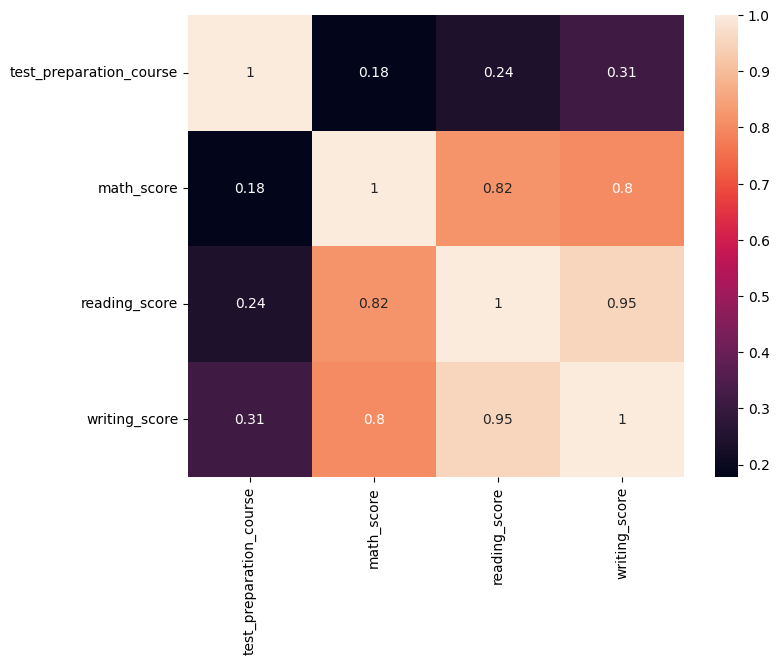

In [16]:
plt.figure(figsize = (8, 6))
sns.heatmap(data = df_corr, annot = True) # degistirilebilir mi bak

In [17]:
# TEK DEGİSKENLİ ANALİZ

In [18]:
df.columns

Index(['gender', 'race', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

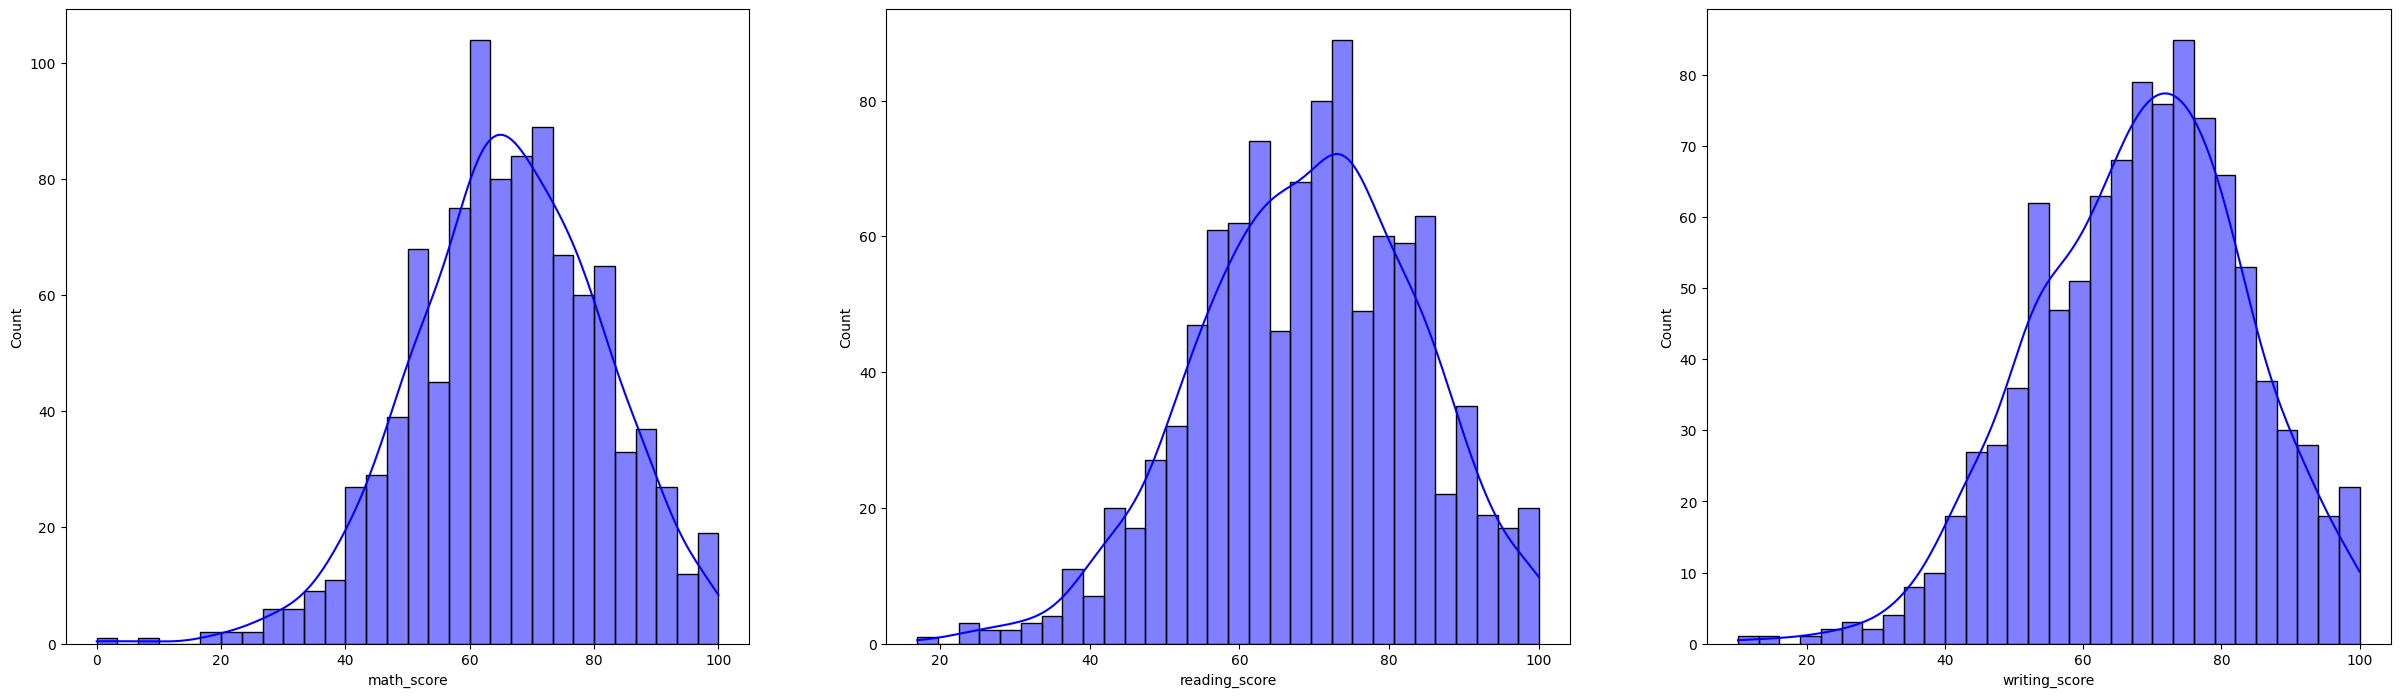

In [19]:
plt.figure(figsize = (30, 28))
for i, col in enumerate(['math_score', 'reading_score','writing_score']):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data = df,
                 x = col,
                 kde = True,
                 bins = 30,
                 color = 'blue')

plt.show()

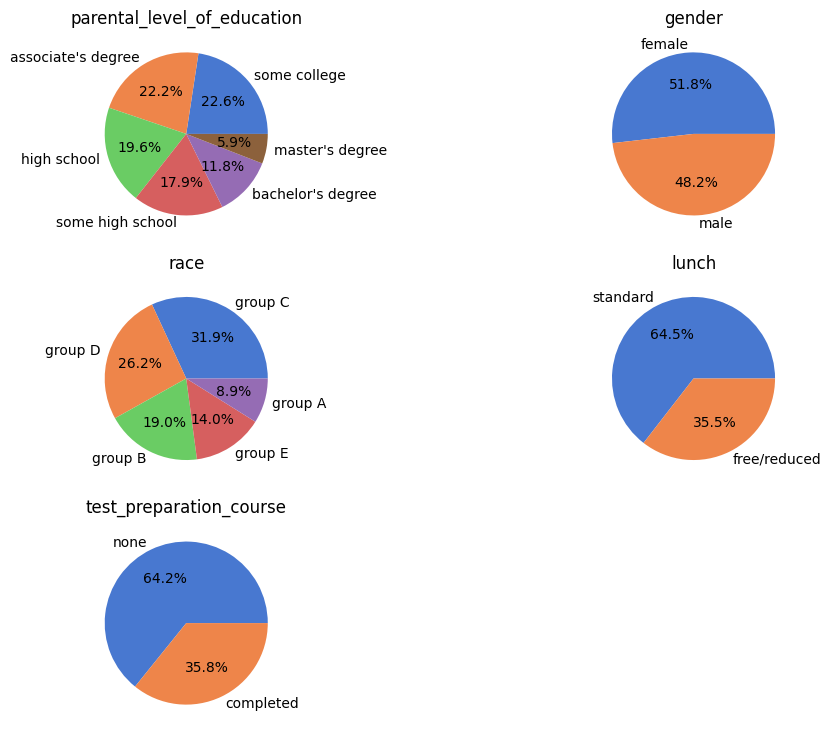

In [20]:
plt.figure(figsize = (12, 9))
for i,col in enumerate(['parental_level_of_education', 'gender', 'race', 'lunch','test_preparation_course']):
    plt.subplot(3, 2, i + 1)
    x = df[col].value_counts().reset_index()
    plt.title(col)
    plt.pie(x = x['count'], labels = x[col], autopct = "%0.1f%%", colors = sns.color_palette('muted'))

In [21]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [22]:
# Tek değişkenli analiz Isı haritasından,
# 3 dersten herhangi birinde yüksek puan alan öğrencilerin diğerlerinde de 
# yüksek puan alma olasılığının yüksek olduğunu görebiliriz



In [23]:
# ÇOK DEĞİŞKENLİ ANALİZ VE DATALAR HAKKINDA SORU SORMA

In [24]:
# Sınava hazırlık kursu almak sınav puanlarını etkiler mi?

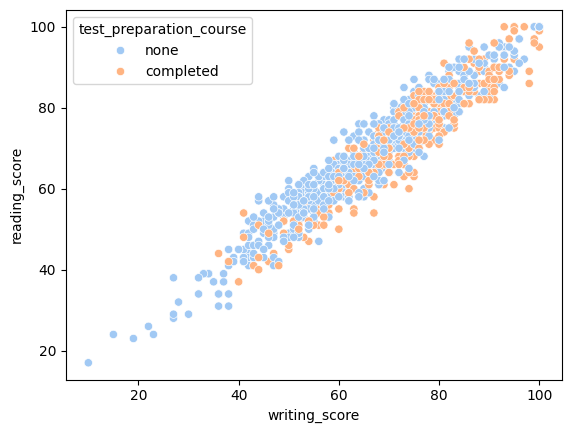

In [26]:
sns.scatterplot(data = df, x = "writing_score", y = "reading_score", hue = "test_preparation_course", palette = sns.color_palette('pastel'))
plt.show()

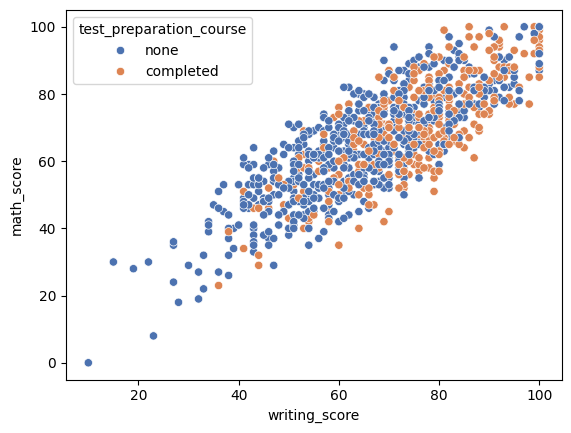

In [29]:
sns.scatterplot(data = df, y = "math_score", x = "writing_score", hue = "test_preparation_course", palette = sns.color_palette('deep'))
plt.show()


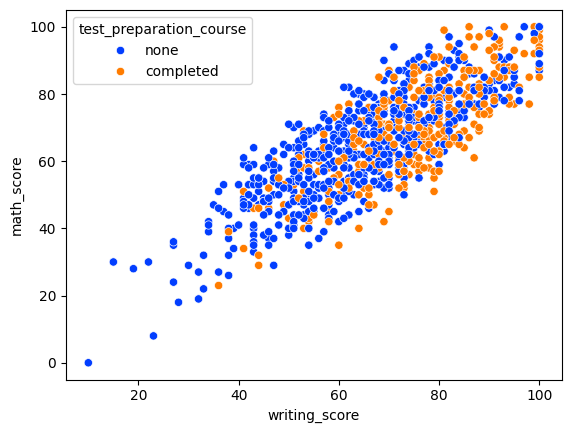

In [32]:
sns.scatterplot(data = df, y = "math_score", x = "writing_score", hue = "test_preparation_course", palette = sns.color_palette('bright'))
plt.show()


In [ ]:
# Yukarıdaki grafiklerden, kursu alan öğrencilerin almayanlara göre ortalama olarak daha yüksek puan aldıklarını görebiliriz

In [ ]:
# Cinsiyet, ırk veya ebeveynlerin eğitim düzeyinin puanlar üzerinde etkisi var mı?

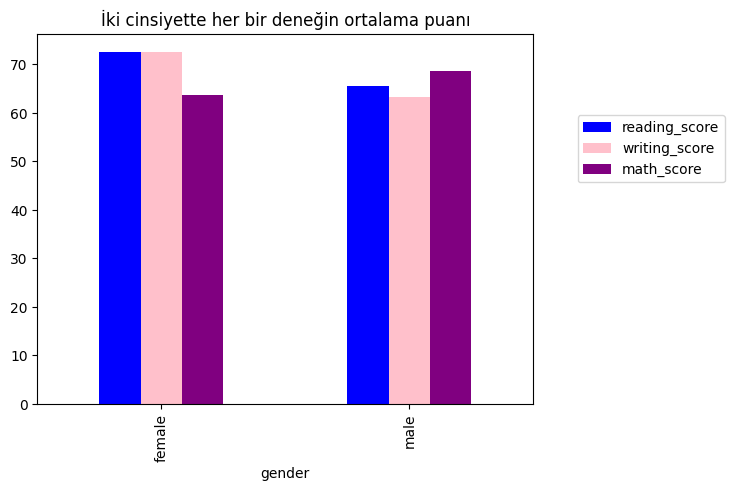

In [35]:
df.groupby("gender")[["reading_score", "writing_score", "math_score"]].mean().plot(kind = "bar", color = ['blue', 'pink', 'purple'], align = 'center')
plt.legend(bbox_to_anchor = (1.4, 0.8))
plt.title("İki cinsiyette her bir deneğin ortalama puanı")
plt.show()

In [ ]:
# Kadınların okuma ve yazmada, 
# erkeklerin ise matematikte daha yüksek ortalama puanlara sahip olduğu görülebilir

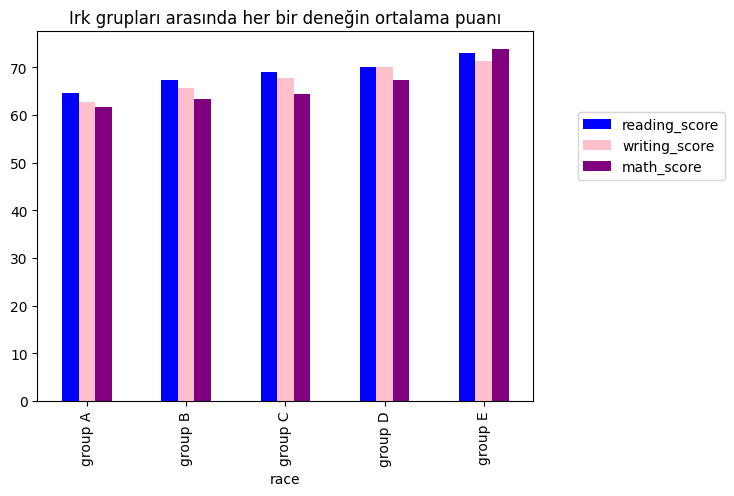

In [36]:
df.groupby("race")[["reading_score", "writing_score", "math_score"]].mean().plot(kind = "bar", color = ['blue', 'pink', 'purple'], align = 'center')
plt.legend(bbox_to_anchor = (1.4, 0.8))
plt.title("Irk grupları arasında her bir deneğin ortalama puanı")
plt.show()

In [ ]:
# E grubu en yüksek ortalama puanlara sahiptir ve onu sırayla D, C, B, A grubu takip etmektedir.

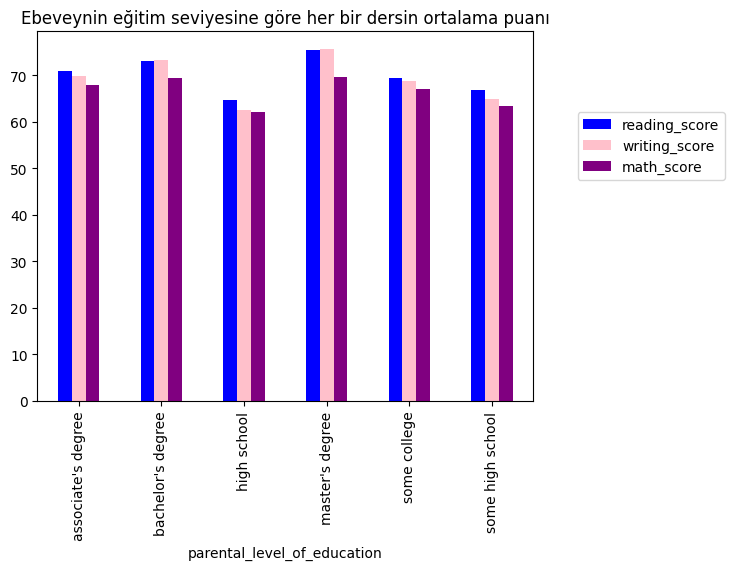

In [38]:
df.groupby("parental_level_of_education")[["reading_score", "writing_score", "math_score"]].mean().plot(kind = "bar",  color = ['blue', 'pink', 'purple'], align = 'center')
plt.legend(bbox_to_anchor = (1.4, 0.8))
plt.title("Ebeveynin eğitim seviyesine göre her bir dersin ortalama puanı")
plt.show()

In [39]:
df.groupby(['lunch','parental_level_of_education'])["lunch"].count()

lunch         parental_level_of_education
free/reduced  associate's degree              77
              bachelor's degree               44
              high school                     70
              master's degree                 24
              some college                    79
              some high school                61
standard      associate's degree             145
              bachelor's degree               74
              high school                    126
              master's degree                 35
              some college                   147
              some high school               118
Name: lunch, dtype: int64

In [ ]:
# Ebeveynlerin eğitim düzeyinin çoğunlukla bir etkisi olmamakla birlikte,
# yüksek lisanslı ebeveynlerin daha yüksek puanlar elde ettiği,
# sadece lise mezunu ebeveynlerin ise en düşük puanlara sahip olduğu görülmektedir

In [ ]:
# Irk veya ebeveynlerin eğitim düzeyi öğrencilerin öğle yemeği yemesini etkiliyor mu?

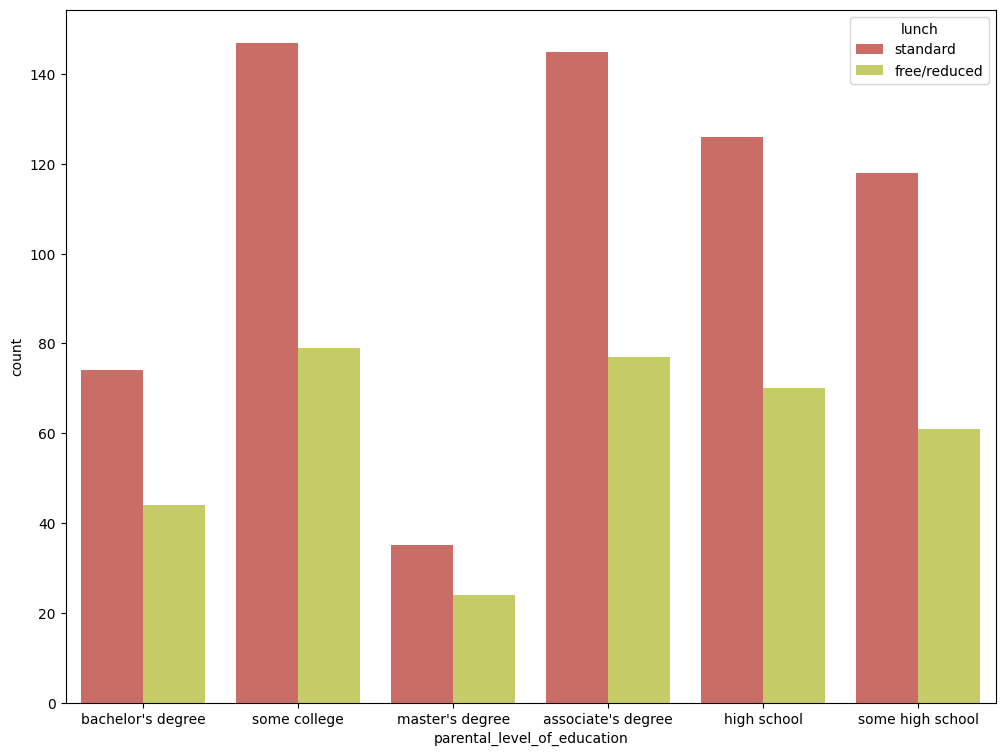

In [40]:
plt.figure(figsize = (12, 9))
sns.countplot(data = df, x = 'parental_level_of_education', hue = 'lunch', palette = sns.color_palette('hls'))
plt.show()

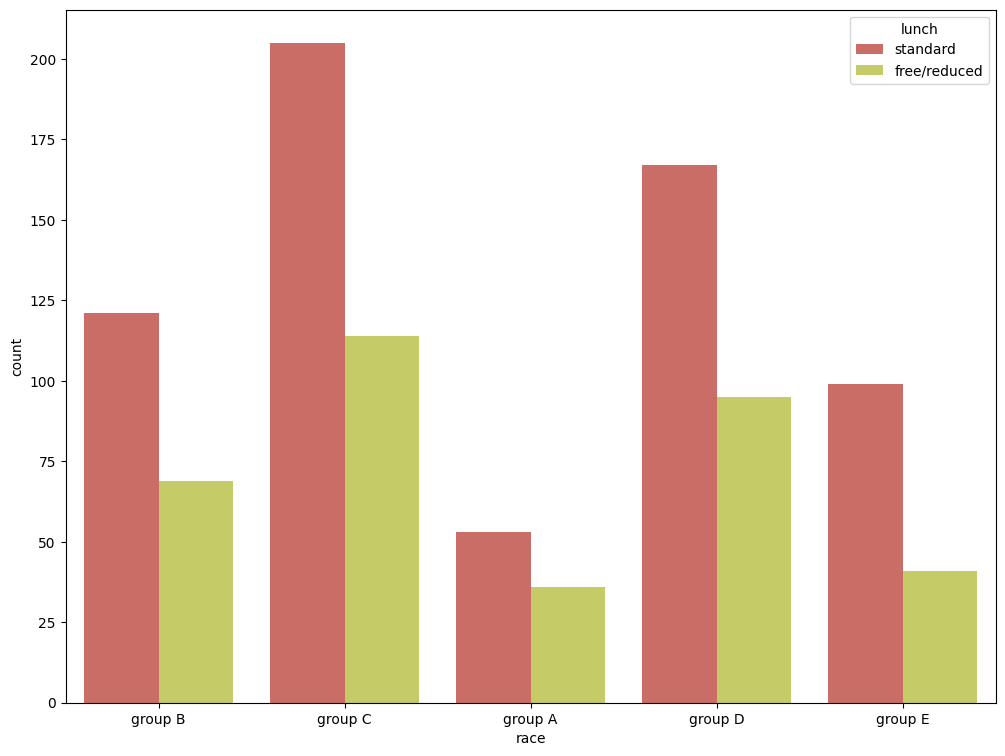

In [41]:
plt.figure(figsize = (12, 9))
sns.countplot(data = df, x = 'race', hue = 'lunch', palette = sns.color_palette('hls'))
plt.show()

In [42]:
# Hem ırk hem de ebeveynin eğitim düzeyi öğrencilerin öğle yemeği yemesini etkilemiyor gibi görünüyor